**Logistic regression** is a supervised learning algorithm used to predict a dependent
 categorical target variable. In essence, if you have a large set of data that you
 want to categorize, logistic regression may be able to help.
 • For example, if you were given a dog and an orange and you wanted to find out
 whether each of these items was an animal or not, the desired result would be for
 the dog to end up classified as an animal, and for the orange to be categorized as
 not an animal.
• Animal is your target; it is dependent on your data in order to be able to classify
 the item correctly. In this example, there are only two possible answers (binary
 logistic regression), animal or not an animal. However, it is also possible to set up
 your logistic regression with more than two possible categories (multinomial
 logistic regression).

In [14]:
import pandas as pd
import random

# Create a DataFrame with the initial data
data = {
    'User ID': [1, 2, 3, 4, 5, 395, 396, 397, 398, 399],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Age': [19, 35, 26, 27, 19, 46, 50, 36, 49, 51],
    'EstimatedSalary': [15624510, 15810944, 15603246, 15804002, 15668575, 15691863, 15706071, 15654296, 15755018, 15594041],
    'Purchased': [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Generate additional 390 rows
for i in range(390):
    gender = random.choice(['Male', 'Female'])
    age = random.randint(18, 60)
    estimated_salary = random.randint(10000, 100000) * 1000
    purchased = random.choice([0, 1])

    df.loc[len(df)] = [len(df), gender, age, estimated_salary, purchased]

# Save the DataFrame to a CSV file
df.to_csv('Ads_dat.csv', index=False)

In [15]:
df= pd.read_csv('/content/Ads_dat.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,15624510,0
1,2,Male,35,15810944,0
2,3,Female,26,15603246,0
3,4,Female,27,15804002,0
4,5,Male,19,15668575,0
...,...,...,...,...,...
395,395,Female,27,38376000,0
396,396,Female,50,76002000,1
397,397,Female,30,37288000,1
398,398,Female,39,55253000,1


In [16]:
 #input data
x=df[['Age','EstimatedSalary']]

#output data
y=df['Purchased']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#cross. validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=0,test_size=0.2)

In [18]:
x_train

array([[0.78571429, 0.86630286],
       [0.0952381 , 0.32523423],
       [0.04761905, 0.37779757],
       [0.5       , 0.72656241],
       [0.54761905, 0.25493556],
       [0.04761905, 0.63077131],
       [0.28571429, 0.81636657],
       [0.07142857, 0.39475494],
       [0.21428571, 0.30802882],
       [0.95238095, 0.10364967],
       [0.83333333, 0.33208934],
       [0.69047619, 0.72277406],
       [0.        , 0.13688792],
       [0.73809524, 0.05298071],
       [0.42857143, 0.0219183 ],
       [0.83333333, 0.69455312],
       [0.42857143, 0.74096039],
       [0.85714286, 0.05414182],
       [0.92857143, 0.82985128],
       [0.5       , 0.6812488 ],
       [0.71428571, 0.94370469],
       [0.23809524, 0.76212328],
       [0.19047619, 0.44322551],
       [0.        , 0.30574002],
       [0.33333333, 0.08281375],
       [0.16666667, 0.01619068],
       [0.        , 0.81442729],
       [0.83333333, 0.22005119],
       [0.23809524, 0.67532951],
       [0.26190476, 0.91622789],
       [0.

In [20]:
y_train

336    0
64     0
55     0
106    0
300    0
      ..
323    0
192    0
117    0
47     0
172    1
Name: Purchased, Length: 320, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Purchased', ylabel='count'>

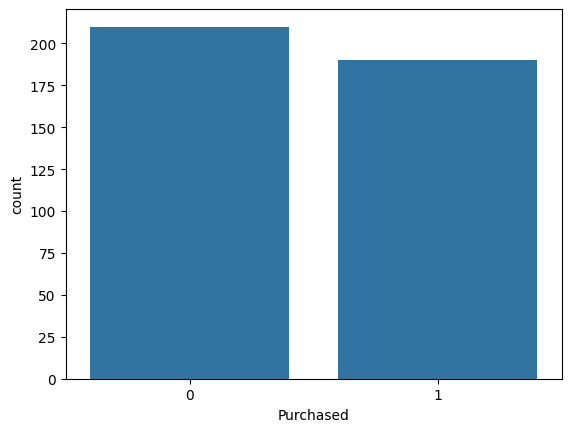

In [21]:
import seaborn as sns
sns.countplot(x=y)

In [22]:
y.value_counts()

0    210
1    190
Name: Purchased, dtype: int64

In [23]:
 #creat the object
classifier = LogisticRegression()

In [24]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [25]:
 #predication
y_pred = classifier.predict(x_test)
y_train.shape

(320,)

In [26]:
x_train.shape

(320, 2)

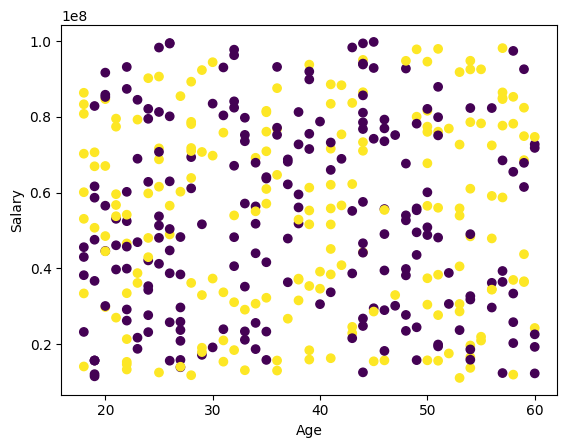

In [27]:
import matplotlib.pyplot as plt
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.475417,0.477639
std,0.302803,0.286456
min,0.000000,0.000000
25%,0.190476,0.224206
50%,0.476190,0.481115
75%,0.738095,0.730557
max,1.000000,1.000000


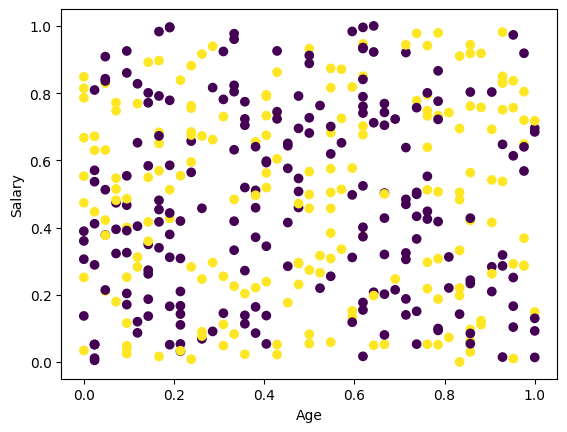

In [30]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)

In [32]:
y_test.value_counts()

0    40
1    40
Name: Purchased, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

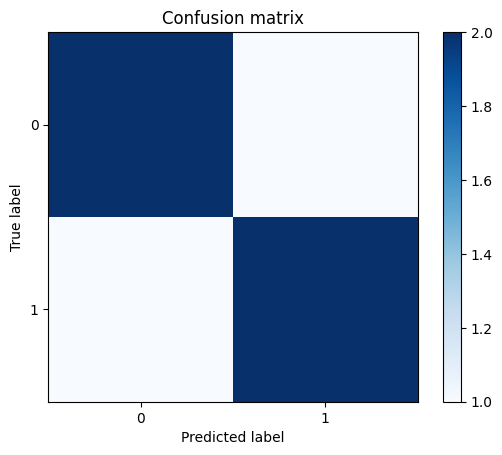

In [3]:
# Assuming y_true and y_pred are your true and predicted labels
y_true = [0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# New data for prediction
new1 = [[26, 34000]]
new2 = [[57, 138000]]

# Predicting on new data
prediction_new1 = classifier.predict(scaler.transform(new1))
prediction_new2 = classifier.predict(scaler.transform(new2))

print("Prediction for new data point 1:", prediction_new1)
print("Prediction for new data point 2:", prediction_new2)


Accuracy: 0.5625
              precision    recall  f1-score   support

           0       0.53      0.97      0.69        40
           1       0.86      0.15      0.26        40

    accuracy                           0.56        80
   macro avg       0.70      0.56      0.47        80
weighted avg       0.70      0.56      0.47        80

Prediction for new data point 1: [0]
Prediction for new data point 2: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
# Get feature importance
feature_importance = classifier.coef_[0]
print("Feature Importance:")
for i, feature in enumerate(x.columns):
    print(feature, ":", feature_importance[i])


Feature Importance:
Age : 0.2343040777752449
EstimatedSalary : 0.07722544174946042
